In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.special import jv
from numba import jit

The differential equation is  
$x^2\frac{d^2 y(x)}{dx^2}+x\frac{d y(x)}{dx}+(x^2-n^2)y(x) = 0$   
Let's define $y(x)=\frac{1}{\Gamma(n+1)}(\frac{x}{2})^{2}z(x)$, therefore, the differential equation become   
$y	=\frac{1}{\varGamma\left(n+1\right)}\left(\frac{x}{2}\right)^{n}z\left(x\right) \\    
y'	=\frac{n}{2\varGamma\left(n+1\right)}\left(\frac{x}{2}\right)^{n-1}z\left(x\right)+\frac{1} {\varGamma\left(n+1\right)}\left(\frac{x}{2}\right)^{n}z'\left(x\right)\\       
y"	=\frac{n\left(n-1\right)}{2\varGamma\left(n+1\right)}\left(\frac{x}{2}\right)^{n-2}z\left(x\right)+\frac{n} {\varGamma\left(n+1\right)}\left(\frac{x}{2}\right)^{n-1}z'\left(x\right)+\frac{1}{\varGamma\left(n+1\right)}\left(\frac{x}{2}\right)^{n}z"\left(x\right)$  

Therefore, we plug it into the equation   
$z"\left(x\right)+\frac{\left(2n+1\right)}{x}z'\left(x\right)+z\left(x\right)=0$





In [2]:
def f_int(y, x,n):
    '''Defines the function'''
    #n=1
    return [-(2*n+1)*y[0]/(x)-y[1], y[0]]

In [3]:
y_0 = np.array([0.0, 1.0])
x = np.linspace(0.0+0.00000000001, 10.0, 1000000)
def f_int_n(y,x):
    return f_int(2, y, x)

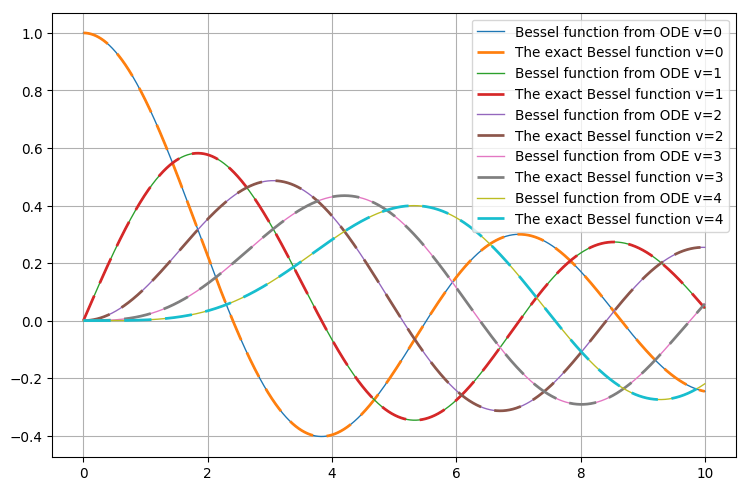

In [33]:
plt.figure(figsize=(9,7),dpi=98)
for n in range(5):
    g="The exact Bessel function v="+str(n)
    s="Bessel function from ODE v="+str(n)
    y_sol = odeint(f_int, y_0, x, args=(n,))[:, 1]/gamma(n+1)*(x/2.0)**(n)
    plt.plot(x, y_sol, label=s,linewidth=1)
    plt.plot(x, jv(n,x),dashes=[10, 5, 10, 5], label=g,linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

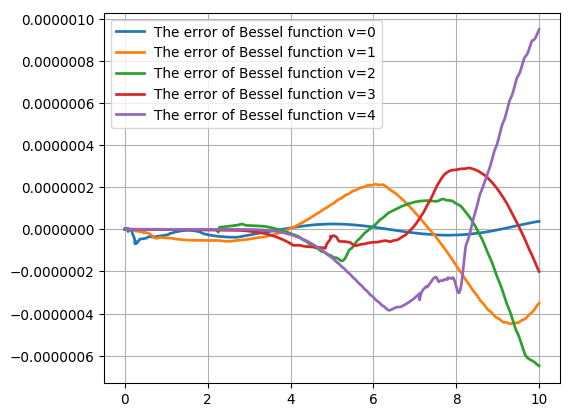

In [31]:
plt.figure(figsize=(6,5),dpi=98)
for n in range(5):
    y_sol = odeint(f_int, y_0, x, args=(n,))[:, 1]/gamma(n+1)*(x/2.0)**(n)
    g="The error of Bessel function v="+str(n)
    plt.plot(x, jv(n,x)-y_sol,label=g,linewidth=2)
    #plt.plot(x, jv(n,x))
plt.grid(True)
plt.legend()
plt.show()

In [131]:
y_sol1=rk4(f_int1, y_0, t)

In [87]:
f_int(y_0, 1,4)

[-1.0, 0.0]

In [129]:
def f_int1(y, t):
    '''Defines the function'''
    return [-2*y[0]-t*y[1], y[0]]
y_0 = np.array([0.0, 1.0])
# set up boundary condition
t = np.linspace(0.0, 5.0, 100000)
# points were the solution is desired

In [14]:
@jit()
def rk4(f,y0,x,args=()):
    xs=x.shape[0]
    yn=np.zeros((y0.shape[0],xs))
    h_2=(x[xs-1]-x[0])/(2*(xs-1))
    k=np.zeros((4,y0.shape[0]))
    yn[:,0]=y0
    yn=rk41(f,yn,xs,k,h_2)
    return yn                            
    #print(args)

@jit()
def rk41(f,yn,xs,k,h_2):
    for i in range(xs-1):
        #print(i)
        #print(args)
        k[0,:]=f(yn[:,i],x[i])
        k[1,:]=f(yn[:,i]+k[0,:]/2.0, x[i]+h_2)
        k[2,:]=f(yn[:,i]+k[1,:]/2.0, x[i]+h_2)
        k[3,:]=f(yn[:,i]+k[2,:], x[i+1])
        yn[:,i+1]=yn[:,i]+h_2*(k[0,:]+2.0*k[1,:]+2.0*k[2,:]+k[3,:])/3.0
    return yn